In [1]:
import pandas as pd



#Reload the dataset
data = pd.read_excel('../atlanta_east/Daily_Data_Atlanta_East.xlsx')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Dropping the original 'Date' column
data = data.drop(columns=['DATE OUT', 'Date', 'Unnamed: 0'])

# Checking the updated dataframe
data.head()


,mean_rate_day,max_rate_day,min_rate_day,mean_rate_mile,max_rate_mile,min_rate_mile,2015,2016,2017,2018,...,2022,SumOfFLEET All,Utilization Rate All,temp,precip,snowdepth,Year,Month,Day,DayOfWeek
0,50.835000,69.99,31.68,0.435600,0.8712,0.0000,0.0,0.0,0.0,0.0,...,0.0,75,0.613333,42.7,0.060,0.0,2015,1,1,3
1,48.480000,69.99,32.46,0.620400,0.9900,0.0000,0.0,0.0,0.0,0.0,...,0.0,73,0.671233,45.7,0.851,0.0,2015,1,2,4
2,42.082857,69.99,33.44,0.818743,0.9900,0.0000,0.0,0.0,0.0,0.0,...,0.0,70,0.642857,51.2,0.221,0.0,2015,1,3,5
3,47.390000,69.99,35.19,0.913733,0.9900,0.8712,0.0,0.0,0.0,0.0,...,0.0,72,0.597222,57.7,1.319,0.0,2015,1,4,6
4,29.990000,29.99,29.99,0.250000,0.2500,0.2500,0.0,0.0,0.0,0.0,...,0.0,72,0.569444,40.8,0.000,0.0,2015,1,5,0


In [2]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
missing_values = data.isnull().sum()

In [4]:
#%% train and test sets
data=data.dropna()
split = int(.8*len(data))

X_train = data.loc[:split,:].drop(['Utilization Rate All'],axis=1)
y_train = data.loc[:split,'Utilization Rate All']

X_test = data.loc[split:,:].drop(['Utilization Rate All'],axis=1)
y_test = data.loc[split:,'Utilization Rate All']


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Calculate the mean squared error for the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

r_squared = r2_score(y_test, y_pred_lr)
print("R-squared:", r_squared)

# Sorting the coefficients in descending order
sorted_coeffs = sorted(zip(X_train.columns, lr.coef_), key=lambda x: x[1], reverse=True)

# Print the intercept
print("Intercept:", lr.intercept_)

# Print the sorted coefficients for each feature
for feature, coef in sorted_coeffs:
    print(f"{feature}: {coef}")


print('________________________________________________')

Linear Regression MSE: 0.005740240052160824
R-squared: -0.35960717543701026
Intercept: 55.99853456085398
2021: 0.15214642674155887
2020: 0.14624370139857898
snowdepth: 0.1070731791421321
2017: 0.07842984296787009
2019: 0.05377812378368321
2016: 0.04014684837251402
max_rate_mile: 0.033372273791950534
2015: 0.021405386660105635
Month: 0.012730712696422513
DayOfWeek: 0.012509276811416333
2018: 0.01110144602203395
mean_rate_day: 0.001818643178458467
Day: 7.273500462828236e-05
2022: -5.551115123125783e-17
max_rate_day: -5.2629321981061225e-05
min_rate_day: -0.0005236361864768847
SumOfFLEET All: -0.0005710024781972791
temp: -0.0008037270009489962
precip: -0.00831973961590118
mean_rate_mile: -0.013416981657004766
min_rate_mile: -0.0161536971074348
Year: -0.027478776446519075
________________________________________________


(0.5799943406904358, 1.0329845686202606, 0.5711234477401771, 1.024113675670002)

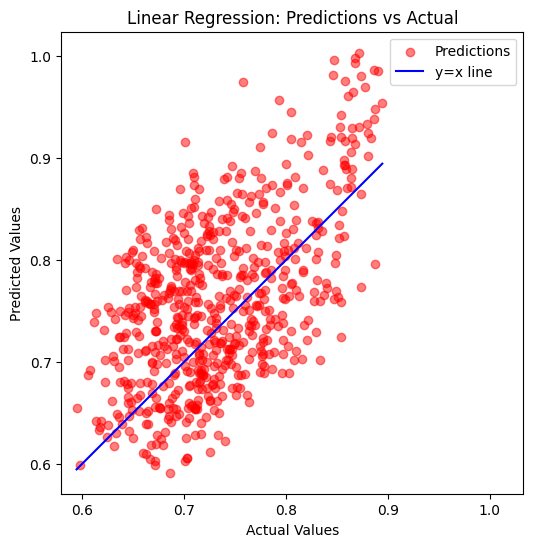

In [6]:
# Linear Regression Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='red', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', label='y=x line')
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

In [7]:
features = data.drop(['Utilization Rate All'], axis=1)
labels = data['Utilization Rate All']

# Split the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 12)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

feature_list = list(features.columns)

Training Features Shape: (2558, 22)
Training Labels Shape: (2558,)
Testing Features Shape: (640, 22)
Testing Labels Shape: (640,)


In [8]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 12)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
mse_rf = mean_squared_error(test_labels, predictions)
print(f"RandomForest MSE: {mse_rf}")
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.04 degrees.
RandomForest MSE: 0.0026478116195418275
Accuracy: 94.31 %.


In [9]:
from sklearn.metrics import r2_score
score = r2_score(test_labels, predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 73.0%


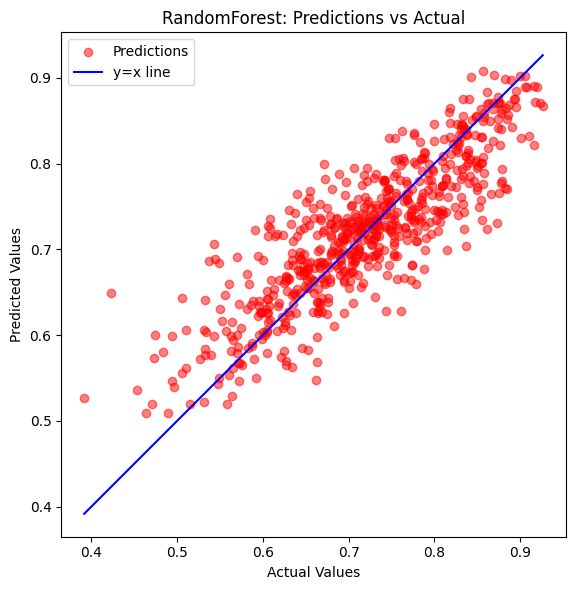

In [10]:
import matplotlib.pyplot as plt

#Random Forest Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(test_labels, predictions, color='red', alpha=0.5, label='Predictions')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='blue', label='y=x line')
plt.title('RandomForest: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

plt.tight_layout()
plt.show()

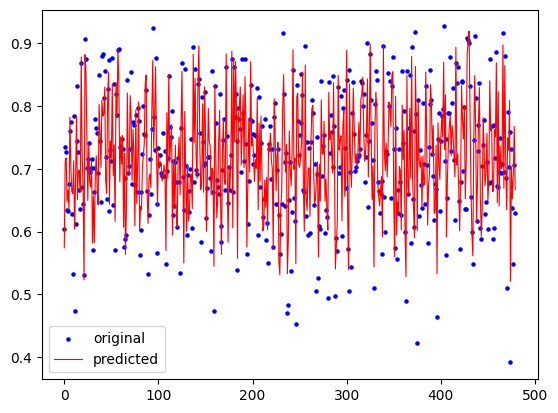

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
x = data.drop(['Utilization Rate All', 'Year'], axis=1)
y = data['Utilization Rate All']

xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=12,
             test_size=0.15)
# with new parameters
gbr = GradientBoostingRegressor(n_estimators=600,
    max_depth=5,
    learning_rate=0.01,
    min_samples_split=3)
# with default parameters
#gbr = GradientBoostingRegressor()

gbr.fit(xtrain, ytrain)

ypred = gbr.predict(xtest)


x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

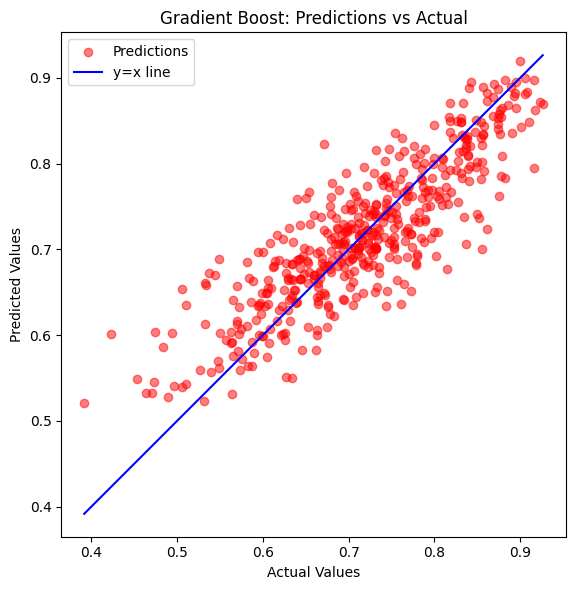

Mean Absolute Error: 0.04 degrees.
480
Accuracy: 94.13 %.


In [12]:
#Gradient Boosting Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(ytest, ypred, color='red', alpha=0.5, label='Predictions')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='blue', label='y=x line')
plt.title('Gradient Boost: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

plt.tight_layout()
plt.show()

# Calculate the absolute errors
errors = abs(ypred - ytest)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print(ypred.shape[0])
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [13]:
mse = mean_squared_error(ytest,ypred)
print(mse)

0.002691831617784139


In [14]:
from sklearn.metrics import r2_score
score = r2_score(ytest, ypred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 74.0%


In [15]:
from sklearn.ensemble import HistGradientBoostingRegressor
x = data.drop(['Utilization Rate All', 'Year'], axis=1)
y = data['Utilization Rate All']

xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=12,
             test_size=0.15)
# with new parameters
hgbr = HistGradientBoostingRegressor(n_estimators=600,
    max_depth=5,
    learning_rate=0.01,
    min_samples_split=3)
# with default parameters
#gbr = GradientBoostingRegressor()

hgbr.fit(xtrain, ytrain)

ypred = hgbr.predict(xtest)


x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

TypeError: HistGradientBoostingRegressor.__init__() got an unexpected keyword argument 'n_estimators'

In [ ]:
#Gradient Boosting Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(ytest, ypred, color='red', alpha=0.5, label='Predictions')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='blue', label='y=x line')
plt.title('HistGradient Boost: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

plt.tight_layout()
plt.show()

# Calculate the absolute errors
errors = abs(ypred - ytest)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print(ypred.shape[0])
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
mse = mean_squared_error(ytest,ypred)
print(mse)
from sklearn.metrics import r2_score
score = r2_score(ytest, ypred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))